#### Họ và tên : Phan Nguyễn Khôi Nguyên
#### MSSSV     : 21068021

In [4]:
#Import thư viện
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Đọc dữ liệu 

In [5]:
data = pd.read_csv(r"T:\21068021_PhanNguyenKhoiNguyen_04-13-2024\data\IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


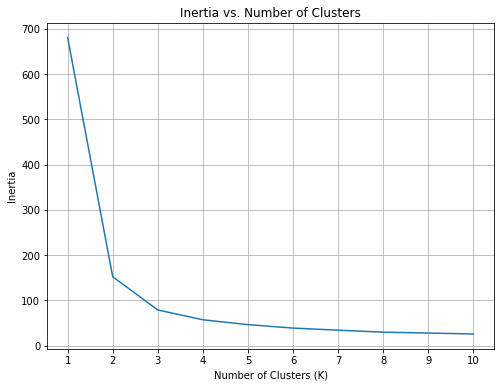

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Tìm inertia cho các giá trị K khác nhau
inertia_values = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
    inertia_values.append(kmeans.inertia_)

# Vẽ đồ thị Inertia vs. Number of Clusters
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values)
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [10]:
# Chọn k bằng 3

In [13]:
# Suppose you have labels for your data (actual_labels) and K-means cluster labels (kmeans_labels) 
actual_labels = [0, 1, 1, 0, 2, 2, 0, 1]
kmeans_labels = [0, 1, 1, 0, 2, 2, 0, 1]
# Create a DataFrame to use crosstab
df = pd.DataFrame({'Actual Labels': actual_labels, 'K-means Labels': kmeans_labels})
# Calculate cross-tabulation
ct = pd.crosstab(df ['Actual Labels'], df['K-means Labels'])
print(ct)

K-means Labels  0  1  2
Actual Labels          
0               3  0  0
1               0  3  0
2               0  0  2


In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(data.drop('species', axis=1))  # Loại bỏ cột 'Species' khi fit

# Dự đoán nhãn của các clusters cho dữ liệu IRIS
kmeans_labels = kmeans.predict(data.drop('species', axis=1))  

# Tạo DataFrame từ nhãn thực tế và nhãn của K-means clusters
df_IRIS = pd.DataFrame({'Actual Labels': data['species'], 'K-means Labels': kmeans_labels})

# Tính toán bảng chéo
ct_IRIS = pd.crosstab(df_IRIS['Actual Labels'], df_IRIS['K-means Labels'])
print(ct_IRIS)

K-means Labels    0   1   2
Actual Labels              
Iris-setosa       0  50   0
Iris-versicolor   2   0  48
Iris-virginica   36   0  14


In [16]:
from sklearn.preprocessing import StandardScaler
# Chuẩn hóa dữ liệu sử dụng Z-score
scaler = StandardScaler()
X = scaler.fit_transform(data.drop('species', axis=1))
y = data['species']

# Áp dụng K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans_labels = kmeans.predict(X)

# Tạo DataFrame từ nhãn thực tế và nhãn của K-means clusters
df_IRIS = pd.DataFrame({'Actual Labels': y, 'K-means Labels': kmeans_labels})

# Tính toán bảng chéo
ct_IRIS = pd.crosstab(df_IRIS['Actual Labels'], df_IRIS['K-means Labels'])
print(ct_IRIS)

K-means Labels    0   1   2
Actual Labels              
Iris-setosa       0  50   0
Iris-versicolor  11   0  39
Iris-virginica   34   0  16


Hầu hết các mẫu Iris-versicolor (48/50) được gán đúng vào cụm 2, chỉ có 2 mẫu vào cụm 0 nhưng sau khi chuẩn hóa Các mẫu Iris-versicolor bị chia làm 2 cụm (11 mẫu vào cụm 0, 39 mẫu vào cụm 2).

Lúc đầu Các mẫu Iris-virginica vẫn bị chia làm 2 cụm (36 mẫu vào cụm 0, 14 mẫu vào cụm 2)nhưng sau khi chuẩn hóa Các mẫu Iris-virginica bị chia làm 2 cụm (34 mẫu vào cụm 0, 16 mẫu vào cụm 2).